In [256]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [257]:
names = open('names.txt').read().splitlines()
chars = sorted(list(set(''.join(names))))
stoi = {s: i + 1 for i, s in enumerate(chars)} # string to index
stoi['.'] = 0 # padding
itos = {i: s for s, i in stoi.items()} # index to string

In [258]:
# Block size and batch size
block_size = 3 # how many characters to predict
# Training and validation split
X = []
Y = []
for name in names:
    context = [0] * block_size # padding
    for ch in name + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix] # shift the context
# Convert to tensors
X = torch.tensor(X)
Y = torch.tensor(Y)

In [259]:
X.shape, Y.shape # (number of examples, block size), (number of examples,)

(torch.Size([228146, 3]), torch.Size([228146]))

In [260]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2),generator=g) # 27 characters, 2-dimensional embedding
# Initialize weights
W1 = torch.randn((2 * block_size, 100), generator=g) # 100 hidden units
W2 = torch.randn((100, 27), generator=g) # 27 characters
# Biases
b1 = torch.randn(100, generator=g) # 100 hidden units
b2 = torch.randn(27, generator=g) # 27 characters
# Parameters
parameters = [C, W1, W2, b1, b2]
# Learning rate
lr = 0.1
# Number of iterations
n = 1000
# Loss function
losses = []
# Batch size
batch_size = 32
# Number of batches
n_batches = X.shape[0] // batch_size

In [261]:
sum(p.nelement() for p in parameters) # number of parameters

3481

In [262]:
for p in parameters:
    p.requires_grad = True # enable gradient tracking   

In [263]:
# Dynamic Learning Rate
lre = torch.linspace(-3, 0, n) # learning rate decay
lrs = 10 ** lre # learning rate
lri = []

In [264]:
max(lrs) # maximum learning rate

tensor(1.)

In [265]:
# Training loop
for i in range(n):
    # Forward pass
    # Sample a batch of data
    ix = torch.randint(0, X.shape[0], (batch_size,)) # random indices
    x_batch = X[ix] # batch of input data
    y_batch = Y[ix] # batch of target data
    # Embedding lookup
    emb = C[x_batch] # (batch_size, block_size, 2)
    # Reshape to (batch_size, block_size * 2)
    emb = emb.view(batch_size, -1) # (batch_size, block_size * 2)
    # Linear layer 1
    h = emb @ W1 + b1 # (batch_size, 100)
    # Activation function
    h = torch.tanh(h) # (batch_size, 100)
    # Linear layer 2
    logits = h @ W2 + b2 # (batch_size, 27)
    # Softmax
    # logits = F.log_softmax(logits, dim=1) # (batch_size, 27)
    # Compute loss
    loss = F.cross_entropy(logits, y_batch) # (batch_size,)
    # Backward pass
    for p in parameters:
        p.grad = None # zero gradients
    loss.backward() # compute gradients
    # Update parameters
    # Learning rate schedule
    lr = lrs[i] # learning rate
    lri.append(lr) # store learning rate for plotting
    for p in parameters:
        p.data -= lr * p.grad # gradient descent
    # Store loss
    losses.append(loss.item()) # store loss for plotting
print(f"Final loss: {loss.item()}")

Final loss: 6.961147785186768


In [266]:
# Actual loss
emb = C[X] # (number of examples, block_size, 2)
emb = emb.view(X.shape[0], -1) # (number of examples, block_size * 2)
h = emb @ W1 + b1 # (number of examples, 100)
h = torch.tanh(h) # (number of examples, 100)
logits = h @ W2 + b2 # (number of examples, 27)
# logits = F.log_softmax(logits, dim=1) # (number of examples, 27)
# Compute loss
loss = F.cross_entropy(logits, Y) # (number of examples,)
print(f"Final loss: {loss.item()}")

Final loss: 7.383413314819336


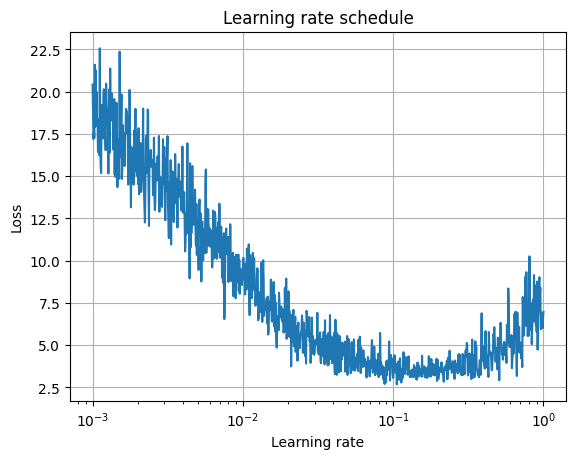

In [267]:
plt.plot(lri, losses)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate schedule')
plt.xscale('log')
plt.grid()
plt.show()


In [268]:
min_loss = min(losses)
min_loss_idx = losses.index(min_loss)
min_lr = lrs[min_loss_idx]
print(f"Minimum loss: {min_loss:.6f} at iteration {min_loss_idx} with learning rate {min_lr:.6f}")

Minimum loss: 2.674372 at iteration 674 with learning rate 0.105688


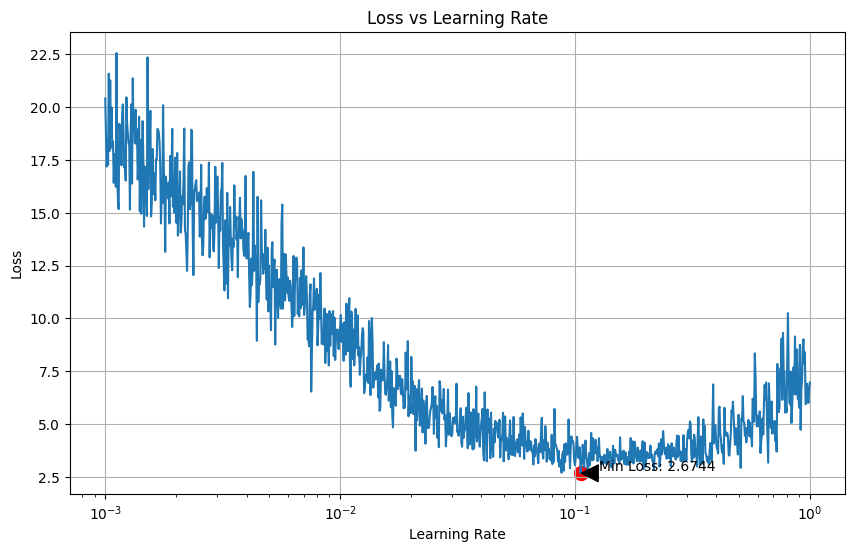

In [269]:
# Plot loss vs learning rate and mark minimum loss point
plt.figure(figsize=(10, 6))
plt.plot(lri, losses)
plt.scatter([min_lr], [min_loss], color='red', s=100)
plt.annotate(f'Min Loss: {min_loss:.4f}', 
             xy=(min_lr, min_loss), 
             xytext=(min_lr*1.2, min_loss*1.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5))
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Loss vs Learning Rate')
plt.xscale('log')
plt.grid(True)
plt.show()

In [270]:
min_loss = min(losses)
min_loss_idx = losses.index(min_loss)
min_lr = lrs[min_loss_idx]
print(f"Minimum loss: {min_loss:.6f} at iteration {min_loss_idx}")
print(f"Learning rate at minimum loss: {min_lr:.6e}")

Minimum loss: 2.674372 at iteration 674
Learning rate at minimum loss: 1.056876e-01


In [271]:
# Number of iterations
n = 1000
# Loss function
losses = []
# Batch size
batch_size = 32
# Number of batches
n_batches = X.shape[0] // batch_size

In [272]:
for p in parameters:
    p.requires_grad = True # enable gradient tracking   

In [273]:
# Training loop
for i in range(n):
    # Forward pass
    # Sample a batch of data
    ix = torch.randint(0, X.shape[0], (batch_size,)) # random indices
    x_batch = X[ix] # batch of input data
    y_batch = Y[ix] # batch of target data
    # Embedding lookup
    emb = C[x_batch] # (batch_size, block_size, 2)
    # Reshape to (batch_size, block_size * 2)
    emb = emb.view(batch_size, -1) # (batch_size, block_size * 2)
    # Linear layer 1
    h = emb @ W1 + b1 # (batch_size, 100)
    # Activation function
    h = torch.tanh(h) # (batch_size, 100)
    # Linear layer 2
    logits = h @ W2 + b2 # (batch_size, 27)
    # Softmax
    # logits = F.log_softmax(logits, dim=1) # (batch_size, 27)
    # Compute loss
    loss = F.cross_entropy(logits, y_batch) # (batch_size,)
    # Backward pass
    for p in parameters:
        p.grad = None # zero gradients
    loss.backward() # compute gradients
    # Update parameters
    for p in parameters:
        p.data -= min_lr * p.grad # gradient descent
    # Store loss
    losses.append(loss.item()) # store loss for plotting
print(f"Final loss: {loss.item()}")

Final loss: 2.6054348945617676


In [274]:
# Actual loss
emb = C[X] # (number of examples, block_size, 2)
emb = emb.view(X.shape[0], -1) # (number of examples, block_size * 2)
h = emb @ W1 + b1 # (number of examples, 100)
h = torch.tanh(h) # (number of examples, 100)
logits = h @ W2 + b2 # (number of examples, 27)
# logits = F.log_softmax(logits, dim=1) # (number of examples, 27)
# Compute loss
loss = F.cross_entropy(logits, Y) # (number of examples,)
print(f"Final loss: {loss.item()}")

Final loss: 2.563643455505371


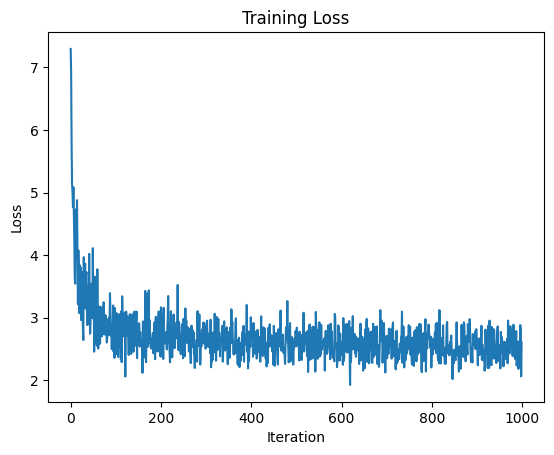

In [275]:
plt.plot(losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()